### Question No. 1

In [172]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
def cumsum(x):
    cumsum = []
    for i in range(1,len(x)+1):
        cumsum.append(sum(x[:i]))
    return cumsum

In [174]:
def poisson_process(rate, n):
    inter = np.random.exponential(1/rate,n)
    return cumsum(inter)

In [175]:
def bid(rate, n):
    d= dict()
    for i in range(n):
        d[poisson_process(rate,n)[i]] = np.random.uniform(0,1,n)[i]
    return list(d.keys()), list(d.values())

In [176]:
prob = []
thetas = [0.1,0.2,0.3,0.4,0.5]
for theta in thetas:
    a = 0
    for i in range(1000):
        count = 0
        t,p = bid(1,30)
        while theta >= p[count]:
            count = count + 1
        if t[count]<1:
            a = a + 1
    prob.append(a/1000)

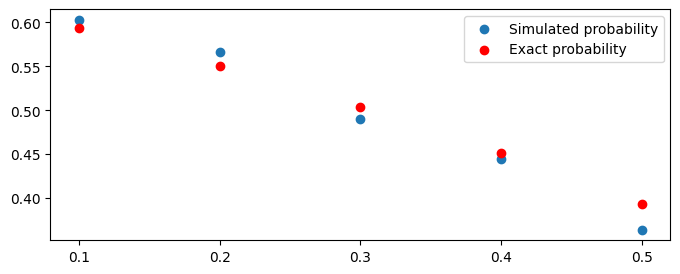

In [177]:
plt.figure(figsize=(8,3))
plt.scatter(thetas, prob, label = "Simulated probability")
plt.scatter(thetas, 1-np.exp([t-1 for t in thetas]), c = "r", label = "Exact probability")
plt.xticks(thetas)
plt.legend(loc = "upper right")
plt.show()

### Question No. 2

In [178]:
def N(rate, n, t):
    return sum([poisson_process(rate, n)[i]<t for i in range(n)])

In [179]:
def Z(rate, n, t):
    return min(np.random.exponential(1/6, N(rate, n, t)))

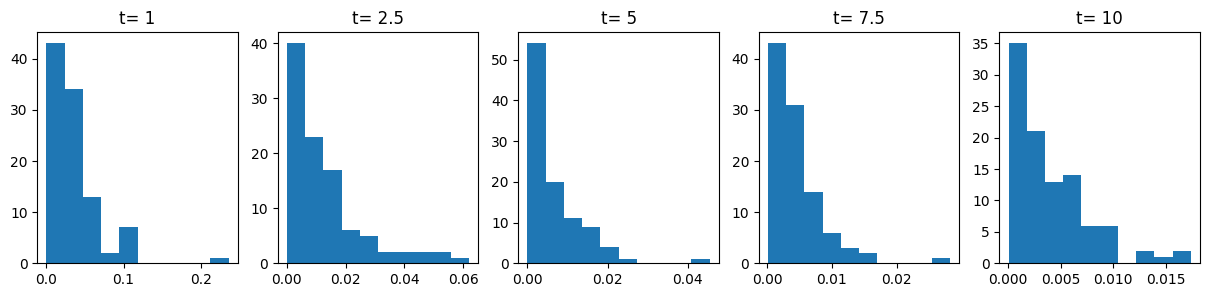

In [180]:
plt.figure(figsize=(15,3))
for i,t in zip(range(1,6),[1,2.5,5,7.5,10]):
    plt.subplot(1,5,i)
    a = []
    for i in range(100):
        a.append(Z(5,60,t))
    plt.hist(a)
    plt.title(f"t= {t}")
plt.show()